-----------------------------------------**Limpieza de datos**----------------------------------------

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
clases=[1,2,3]
max_por_clase = df.groupby('Pclass')['Fare'].max()
promedio_por_clase = df.groupby('Pclass')['Fare'].mean()

print(max_por_clase)
print(promedio_por_clase)

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [ ]:
print(df["Age"].dtypes)

float64


In [ ]:
media_edad = df["Age"].mean()
print(media_edad)


29.69911764705882


In [ ]:
df.fillna({"Age":media_edad}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
cabina = "Sin cabina"
df.fillna({"Cabin":cabina}, inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
puerto = df["Embarked"].mode()
df.fillna({"Embarked":puerto}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---------------------------------------------------------**Transformación logaritmica de datos**--------------------------------------------------------

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(df[['Age','Fare']].describe())

df['Fare_Log'] = np.log1p(df['Fare'])
df['Age_Log'] = np.log1p(df["Age"])
df = df.copy()

print(df[['Age','Fare', 'Age_Log', 'Fare_Log']].describe())

              Age        Fare
count  891.000000  891.000000
mean    29.699118   32.204208
std     13.002015   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     29.699118   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200
              Age        Fare     Age_Log    Fare_Log
count  891.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    3.291723    2.962246
std     13.002015   49.693429    0.615804    0.969048
min      0.420000    0.000000    0.350657    0.000000
25%     22.000000    7.910400    3.135494    2.187218
50%     29.699118   14.454200    3.424234    2.737881
75%     35.000000   31.000000    3.583519    3.465736
max     80.000000  512.329200    4.394449    6.240917


In [ ]:
df['Sex_encoded'] = df['Sex'].map({'male': 1, 'female': 0})
df.head()
df['Embarked_encoded'] = df['Embarked'].map({'S': 1, 'C': 0, "Q":3})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Log,Age_Log,Sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Sin cabina,S,2.110213,3.135494,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,3.663562,0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Sin cabina,S,2.188856,3.295837,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,3.583519,0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Sin cabina,S,2.202765,3.583519,1,1.0


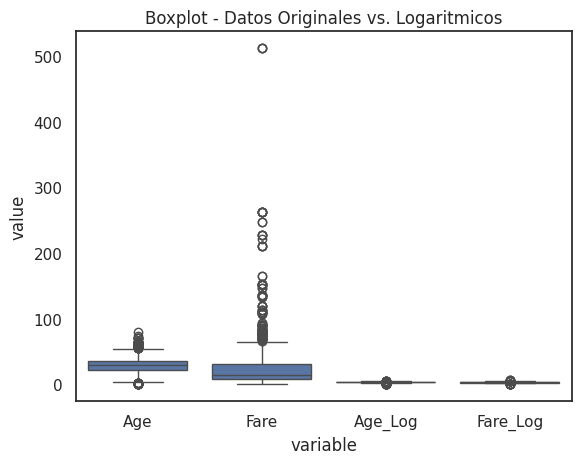

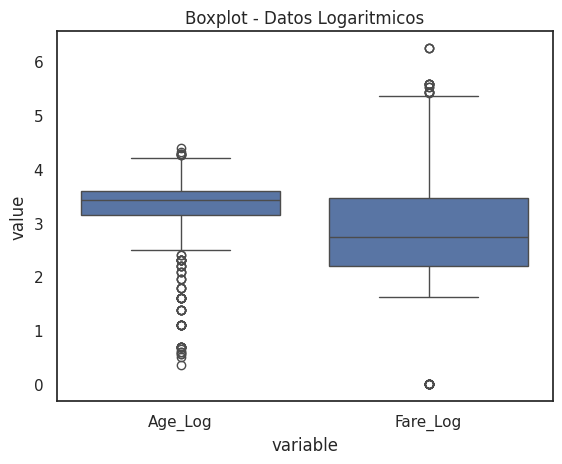

In [ ]:
# Boxplot para comparar versiones logaritmicas
sns.boxplot(x='variable', y='value', data=pd.melt(df[['Age', 'Fare', 'Age_Log', 'Fare_Log']]))
plt.title('Boxplot - Datos Originales vs. Logaritmicos')
plt.show()

# Boxplot para comparar versiones logaritmicas
sns.boxplot(x='variable', y='value', data=pd.melt(df[['Age_Log', 'Fare_Log']]))
plt.title('Boxplot - Datos Logaritmicos')
plt.show()

-------------------------------------------**Selección de cracterísticas**-----------------------------------------------------------

In [ ]:
df['Survived'].unique()

array([0, 1])

<Axes: >

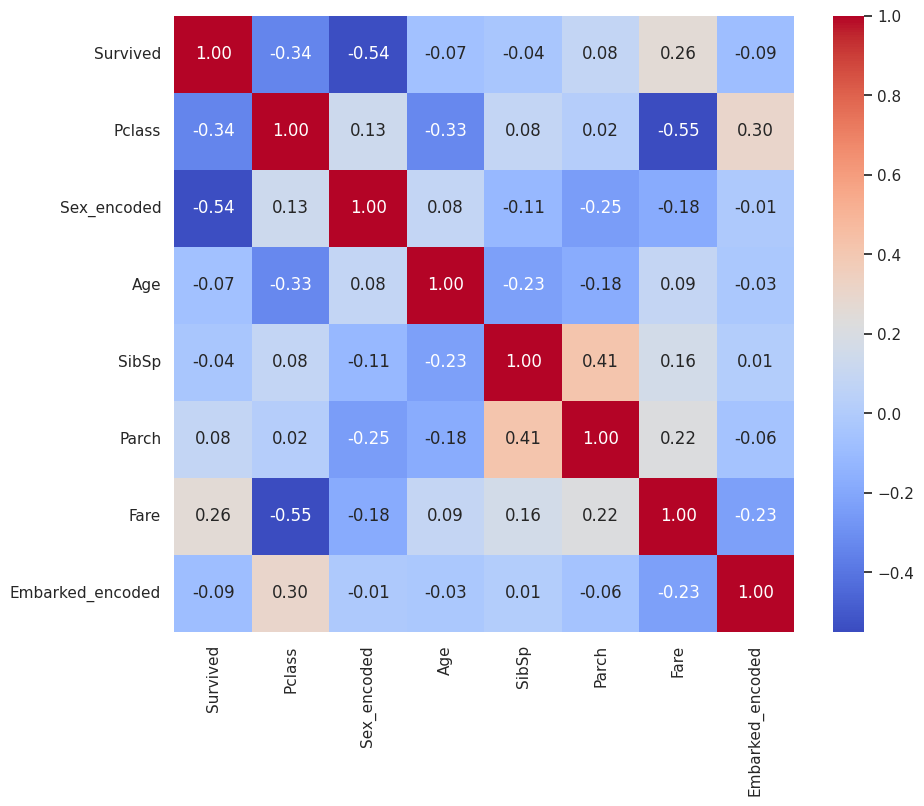

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#en esta aprte creo una matriz de corelación pque me permite ver que variables voy a tomar para relacionarlas a la variables survived que es la que me interesa, tomando ene ste caso Pclñass, sex_econded y fare

df_caracteristicas = df[["Survived","Pclass", "Sex_encoded", "Age", "SibSp", "Parch", "Fare", "Embarked_encoded"]]

correlation_matrix = df_caracteristicas.corr()

sns.set(style="white")



plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


-----------------------------------------------------------------**Clasificación por arbol de desición**-------------------------------------------------------

In [ ]:
#Aquí estoy definiendo mis variables "X" y "y"
X=df[["Pclass", "Sex_encoded", "Fare"]]
y=df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
# esta parte dle código entrena el modelo, y muestra la cantidad de filas que toma apra entrenar y la cantidad de columas, tomanod una logíca de 80-20 para entrtenarlo y 20 para testear.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print	(y_train.shape)
print(y_test.shape)

(712, 3)
(179, 3)
(712,)
(179,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.tree import export_graphviz
import graphviz

# Crear el modelo de árbol de decisión`
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_prediccion = modelo_arbol.predict(X_test)

for pred in y_prediccion:
    if pred == 1:
        print("sobrevive")
    else:
        print("no sobrevive")

no sobrevive
no sobrevive
sobrevive
no sobrevive
sobrevive
no sobrevive
sobrevive
no sobrevive
sobrevive
no sobrevive
sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
sobrevive
no sobrevive
sobrevive
no sobrevive
sobrevive
sobrevive
sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
sobrevive
no sobrevive
sobrevive
sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobre

In [ ]:
presicion_del_arbol= accuracy_score(y_test, y_prediccion)
print(presicion_del_arbol)

0.8324022346368715


In [ ]:
#--------------------------------------------------------------------------------------------------------------------predicciones de prueba---------------------------------------------------------------------------------------------------
nueva_entrada_1 = {
    'Pclass': [1],
    'Sex_encoded': [1],
    'Fare': [3000.0]
}


nueva_entrada_2 = {
    'Pclass': [3],
    'Sex_encoded': [1],
    'Fare': [10.0]
}

# Crea un DataFrame de Pandas para la nueva entrada
# Es crucial que las columnas coincidan con las de X (Pclass, Sex_encoded, Fare)
df_prueba_1 = pd.DataFrame(nueva_entrada_1, columns=X.columns)
df_prueba_2 = pd.DataFrame(nueva_entrada_2, columns=X.columns)

print("\nNuevas entradas definidas:")
print(df_prueba_1)
print(df_prueba_2)
prediccion_arbol_1 = modelo_arbol.predict(df_prueba_1)
prediccion_arbol_2 = modelo_arbol.predict(df_prueba_2)
if prediccion_arbol_1[0] == 1:
    print(f"Para la entrada 1 (Pclass: {nueva_entrada_1['Pclass'][0]}, Sex: {'Female' if nueva_entrada_1['Sex_encoded'][0]==0 else 'Male'}, Fare: {nueva_entrada_1['Fare'][0]}): Se predice que 'Sobrevive'")
else:
    print(f"Para la entrada 1 (Pclass: {nueva_entrada_1['Pclass'][0]}, Sex: {'Female' if nueva_entrada_1['Sex_encoded'][0]==0 else 'Male'}, Fare: {nueva_entrada_1['Fare'][0]}): Se predice que 'No Sobrevive'")

if prediccion_arbol_2[0] == 1:
    print(f"Para la entrada 2 (Pclass: {nueva_entrada_2['Pclass'][0]}, Sex: {'Female' if nueva_entrada_2['Sex_encoded'][0]==0 else 'Male'}, Fare: {nueva_entrada_2['Fare'][0]}): Se predice que 'Sobrevive'")
else:
    print(f"Para la entrada 2 (Pclass: {nueva_entrada_2['Pclass'][0]}, Sex: {'Female' if nueva_entrada_2['Sex_encoded'][0]==0 else 'Male'}, Fare: {nueva_entrada_2['Fare'][0]}): Se predice que 'No Sobrevive'")


Nuevas entradas definidas:
   Pclass  Sex_encoded    Fare
0       1            1  3000.0
   Pclass  Sex_encoded  Fare
0       3            1  10.0
Para la entrada 1 (Pclass: 1, Sex: Male, Fare: 3000.0): Se predice que 'Sobrevive'
Para la entrada 2 (Pclass: 3, Sex: Male, Fare: 10.0): Se predice que 'No Sobrevive'


---------------------------------------**clasificación por SVM**------------------------------------------------

In [ ]:
import sklearn.svm as svm
C = 1.0  # Parámetro de regularización SVM
modelos = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual=True),  # Establecer dual en True
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

modelos = (clf.fit(X, y) for clf in modelos)

# títulos para los gráficos
titulos = (
    "SVC con kernel lineal",
    "LinearSVC (kernel lineal)",
    "SVC con kernel RBF",
    "SVC con kernel polinómico (grado 3)",)

In [ ]:
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

#Aquí estoy definiendo mis variables "X" y "y"
X=df[["Pclass", "Sex_encoded", "Fare"]]
y=df["Survived"]

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# random_state para reproducibilidad si el kernel no es lineal
modelo_svm = SVC(kernel='rbf', C=1.0, random_state=42)

In [ ]:
#Entrenar el modelo
modelo_svm.fit(X_train, y_train)

# predicciones
y_prediccion_svm = modelo_svm.predict(X_test)
print(y_prediccion_svm)
for pred in y_prediccion_svm:
    if pred == 1:
        print("sobrevive")
    else:
        print("no sobrevive")

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0]
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
no sobrevive
sobrevive
no sobrevive
no sobrevive
no sobrevi

In [ ]:
# Evaluar el rendimiento del modelo
precision_svm = accuracy_score(y_test, y_prediccion_svm)
print(f"Precisión (Accuracy) del modelo SVM: {precision_svm:.4f}")


Precisión (Accuracy) del modelo SVM: 0.7318


                                                                           Reportes de los métodos de clasificación


In [ ]:
#Reporte de arbol de decisión
print("\nReporte de Clasificación del árbol dedesición:")
print(classification_report(y_test, y_prediccion))


Reporte de Clasificación del árbol dedesición:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       119
           1       0.73      0.78      0.76        60

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.84      0.83      0.83       179



In [ ]:
#Reporte de vectores de soporte
print("\nReporte de Clasificación del modelo SVM:")
print(classification_report(y_test, y_prediccion_svm))


Reporte de Clasificación del modelo SVM:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       119
           1       0.69      0.37      0.48        60

    accuracy                           0.73       179
   macro avg       0.71      0.64      0.65       179
weighted avg       0.72      0.73      0.71       179



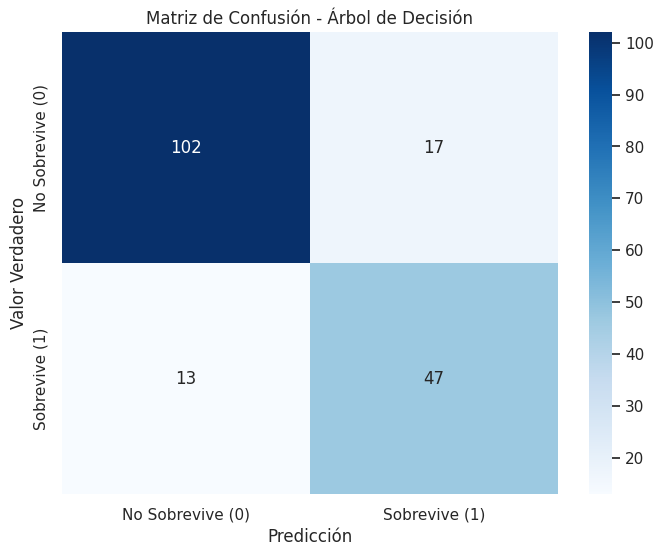

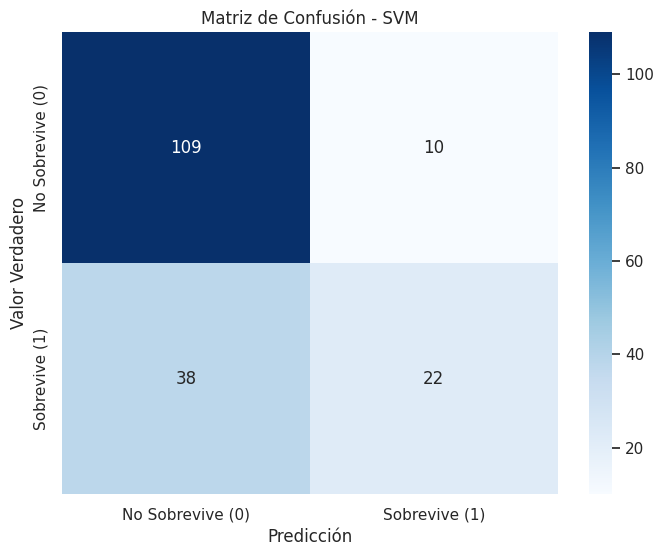

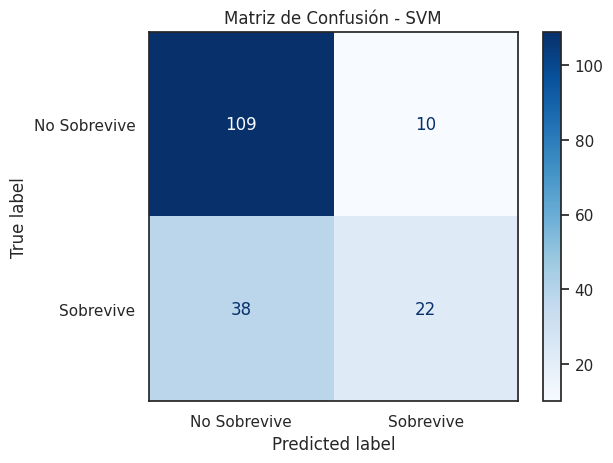

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  Matriz de Confusión para el Árbol de Decisión
cm_arbol = confusion_matrix(y_test, y_prediccion)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_arbol, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Sobrevive (0)', 'Sobrevive (1)'],
            yticklabels=['No Sobrevive (0)', 'Sobrevive (1)'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()


#  Matriz de Confusión para SVM
cm_svm = confusion_matrix(y_test, y_prediccion_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Sobrevive (0)', 'Sobrevive (1)'],
            yticklabels=['No Sobrevive (0)', 'Sobrevive (1)'])
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

# Opcional: Usando ConfusionMatrixDisplay
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['No Sobrevive', 'Sobrevive'])
disp_svm.plot(cmap='Blues')
plt.title('Matriz de Confusión - SVM')
plt.show()

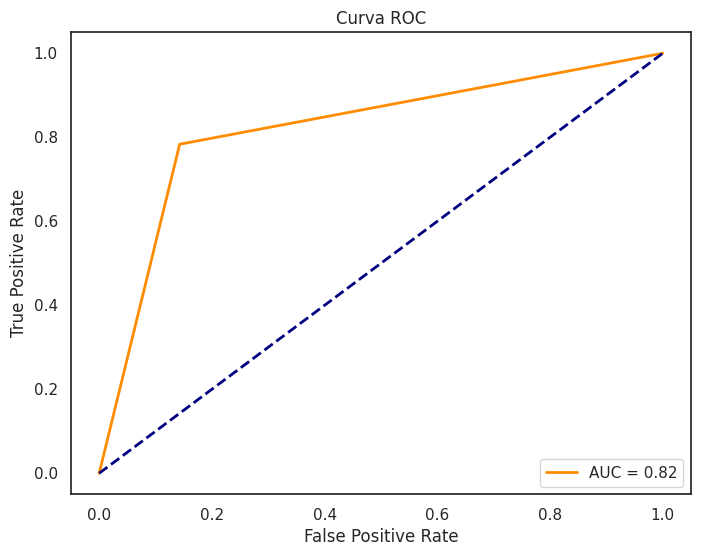

In [ ]:
#ROC y AUC para árbol de desición
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Your existing code
# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prediccion)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

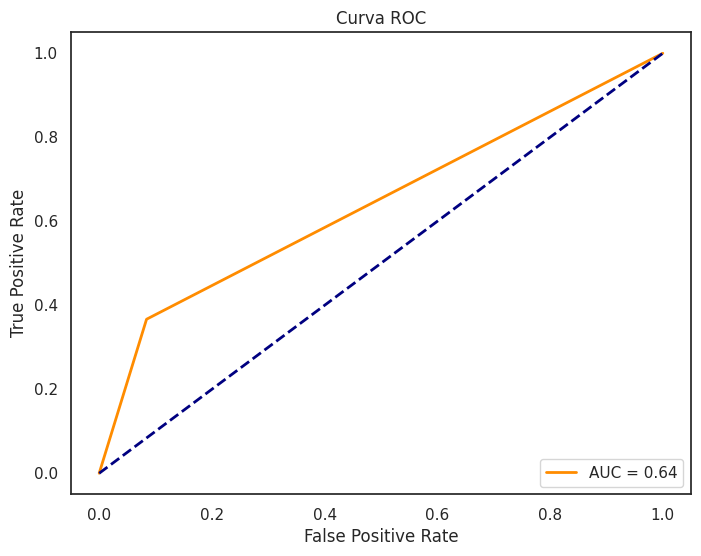

In [ ]:
#ROC y AUC para SVM
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prediccion_svm)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Reporte: Evaluación del Modelo SVM**
Capacidad General (AUC): 0.64

El modelo SVM tiene una capacidad de distinción moderada, mejor que el azar, pero con margen considerable para mejorar.

Precisión General (Accuracy): 73%

**Desempeño por Clases:**

Clase "No Sobrevive" (0): Muy buen desempeño (recall del 92%).

Clase "Sobrevive" (1): Rendimiento débil; solo detecta al 37% de los casos reales de supervivencia (recall bajo).

**Mejor Métrica de Evaluación:**

El F1-Score para la Clase "Sobrevive" (0.48) y el Recall para la Clase "Sobrevive" (0.37) son las métricas más críticas, ya que revelan que el modelo está fallando en identificar a la mayoría de los sobrevivientes reales.

**Conclusión:**

El modelo SVM actual es débil en la detección de la clase minoritaria ("Sobrevive"). Se necesita trabajar en mejorar su capacidad para identificar a los sobrevivientes.

**Reporte: Evaluación del Modelo de Clasificación (Árbol de Decisión)**

Capacidad de Discriminación (AUC): 0.82

El modelo muestra una buena capacidad para distinguir entre quienes sobreviven y quienes no, siendo significativamente mejor que una suposición al azar.

Precisión General (Accuracy): 83%

El modelo acierta el 83% de todas sus predicciones.

**Desempeño por Clases:**

Clase "No Sobrevive" (0): Muy buen desempeño (precisión 89%, recall 86%).

Clase "Sobrevive" (1): Buen desempeño (precisión 73%, recall 78%), aunque con margen de mejora.

**Mejor Métrica de Evaluación:**

Dado el desbalance en los datos, las métricas más relevantes son el AUC (0.82), que mide la capacidad general de distinción, y el F1-Score para la Clase "Sobrevive" (0.76), que balancea la precisión y el recall para la clase de interés.

**Conclusión:**

El modelo es sólido y eficaz, con una clara capacidad de predicción. Si bien identifica mejor a los no sobrevivientes, su rendimiento en la detección de sobrevivientes es prometedor.